In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler,normalize
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.cluster import MeanShift
from sklearn.cluster import estimate_bandwidth
from sklearn import metrics

from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset = pd.read_csv('book_credit_rating.csv')

In [3]:
dataset.drop(dataset.loc[:,['SSN']],axis=1,inplace = True)

# Summarising the data

In [4]:
dataset.head()

,payment_history,credit_utilization,len_credit_history,mix_credit,new_credit,credit_score
0,0.74,0.13,0.78,0.81,0.43,557
1,0.76,0.05,0.82,0.37,0.80,448
2,0.90,0.15,0.74,0.37,0.29,626
3,0.53,0.12,0.97,0.80,0.63,416
4,0.67,0.12,0.74,0.37,0.83,321


In [5]:
dataset.shape

(58522, 6)

array([[<AxesSubplot:title={'center':'payment_history'}>,
        <AxesSubplot:title={'center':'credit_utilization'}>],
       [<AxesSubplot:title={'center':'len_credit_history'}>,
        <AxesSubplot:title={'center':'mix_credit'}>],
       [<AxesSubplot:title={'center':'new_credit'}>,
        <AxesSubplot:title={'center':'credit_score'}>]], dtype=object)

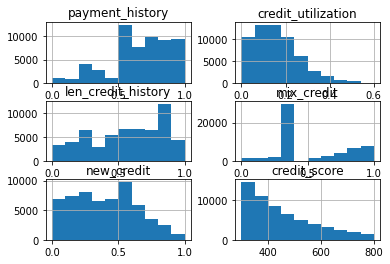

In [6]:
dataset.hist()

# Sampling Method

In [7]:
dataset = dataset.sample(frac = 0.90)

In [8]:
dataset.shape

(52670, 6)

# Explotary data analysis

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52670 entries, 13908 to 19604
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   payment_history     52670 non-null  float64
 1   credit_utilization  52670 non-null  float64
 2   len_credit_history  52670 non-null  float64
 3   mix_credit          52670 non-null  float64
 4   new_credit          52670 non-null  float64
 5   credit_score        52670 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 2.8 MB


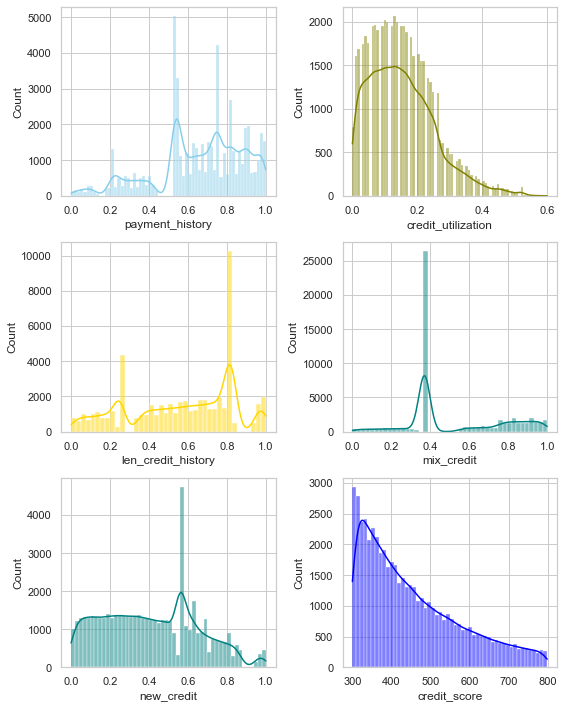

In [10]:
sns.set(style="whitegrid")  
fig,axs = plt.subplots(3,2, figsize = (8,10))
sns.histplot(data=dataset, x="payment_history", kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=dataset, x="credit_utilization", kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=dataset, x="len_credit_history", kde=True, color="gold", ax=axs[1, 0])
sns.histplot(data=dataset, x="mix_credit", kde=True, color="teal", ax=axs[1, 1])
sns.histplot(data=dataset, x="new_credit", kde=True, color="teal", ax=axs[2, 0])
sns.histplot(data=dataset, x="credit_score", kde=True, color="blue", ax=axs[2, 1])

fig.tight_layout()

In [11]:
dataset.corr()

,payment_history,credit_utilization,len_credit_history,mix_credit,new_credit,credit_score
payment_history,1.000000,0.345662,-0.093871,-0.078219,0.225065,0.073367
credit_utilization,0.345662,1.000000,0.149016,0.091534,-0.454980,-0.424522
len_credit_history,-0.093871,0.149016,1.000000,-0.024840,0.096278,0.037296
mix_credit,-0.078219,0.091534,-0.024840,1.000000,0.048030,0.021823
new_credit,0.225065,-0.454980,0.096278,0.048030,1.000000,-0.252122
credit_score,0.073367,-0.424522,0.037296,0.021823,-0.252122,1.000000


# Hypothesis testing
Column: Payment history\
Null Hypothesis: loan/credit card payments doesnt impacts credit score

In [12]:
dataset['payment_hist'] = dataset['payment_history'].apply(lambda x : 0 if x < 0.12 else 1)
datasetModified_for_payment_history = dataset[['credit_score', 'payment_hist']]
print(datasetModified_for_payment_history.head(5))

d1 = datasetModified_for_payment_history[(datasetModified_for_payment_history['payment_hist']==1)]['credit_score']
d2 = datasetModified_for_payment_history[(datasetModified_for_payment_history['payment_hist']==0)]['credit_score']

m1_for_payment_history, m2_for_payment_history = d1.mean(), d2.mean()
sd1_for_payment_history, sd2_for_payment_history = d1.std(), d2.std()
n1_for_payment_history, n2_for_payment_history = d1.shape[0], d2.shape[0]

from numpy import sqrt, abs, round
from scipy.stats import norm
def model(X1, X2, sigma1, sigma2, N1, N2): #Two sample Z test
    ovr_sigma_for_payment_history = sqrt(sigma1**2/N1 + sigma2**2/N2)
    z_for_payment_history = (X1 - X2)/ovr_sigma_for_payment_history
    pval_for_payment_history = 2*(1 - norm.cdf(abs(z_for_payment_history)))
    return z_for_payment_history, pval_for_payment_history
z_for_payment_history, p_for_payment_history = model(m1_for_payment_history, m2_for_payment_history,\
                                                     sd1_for_payment_history,\
                                                     sd2_for_payment_history, n1_for_payment_history,\
                                                     n2_for_payment_history)

z_score_for_payment_history = np.round(z_for_payment_history,8)
p_val_for_payment_history = np.round(p_for_payment_history,6)

if (p_val_for_payment_history<0.05):
    Hypothesis_Status_for_payment_history = 'Reject Null Hypothesis : Significant'
else:
    Hypothesis_Status_for_payment_history = 'Do not reject Null Hypothesis : Not Significant'

print ('p-value: ',p_val_for_payment_history)
print (Hypothesis_Status_for_payment_history)

       credit_score  payment_hist
13908           542             1
37325           497             1
11471           538             1
15114           413             1
29241           349             1
p-value:  0.000255
Reject Null Hypothesis : Significant


Null Hypothesis: length of credit history doesnt impacts the credit score

In [13]:
dataset['payment_hist'] = dataset['len_credit_history'].apply(lambda x : 0 if x < 0.12 else 1)
datasetModified_for_payment_history = dataset[['credit_score', 'len_credit_history']]
print(datasetModified_for_payment_history.head(5))

d1 = datasetModified_for_payment_history[(datasetModified_for_payment_history['len_credit_history']==1)]['credit_score']
d2 = datasetModified_for_payment_history[(datasetModified_for_payment_history['len_credit_history']==0)]['credit_score']

m1_for_payment_history, m2_for_payment_history = d1.mean(), d2.mean()
sd1_for_payment_history, sd2_for_payment_history = d1.std(), d2.std()
n1_for_payment_history, n2_for_payment_history = d1.shape[0], d2.shape[0]

from numpy import sqrt, abs, round
from scipy.stats import norm
def model(X1, X2, sigma1, sigma2, N1, N2): #Two sample Z test
    ovr_sigma_for_payment_history = sqrt(sigma1**2/N1 + sigma2**2/N2)
    z_for_payment_history = (X1 - X2)/ovr_sigma_for_payment_history
    pval_for_payment_history = 2*(1 - norm.cdf(abs(z_for_payment_history)))
    return z_for_payment_history, pval_for_payment_history
z_for_payment_history, p_for_payment_history = model(m1_for_payment_history, m2_for_payment_history,\
                                                     sd1_for_payment_history,\
                                                     sd2_for_payment_history, n1_for_payment_history,\
                                                     n2_for_payment_history)

z_score_for_payment_history = np.round(z_for_payment_history,8)
p_val_for_payment_history = np.round(p_for_payment_history,6)

if (p_val_for_payment_history<0.05):
    Hypothesis_Status_for_payment_history = 'Reject Null Hypothesis : Significant'
else:
    Hypothesis_Status_for_payment_history = 'Do not reject Null Hypothesis : Not Significant'

print ('p-value: ',p_val_for_payment_history)
print (Hypothesis_Status_for_payment_history)

       credit_score  len_credit_history
13908           542                0.82
37325           497                0.25
11471           538                0.82
15114           413                0.96
29241           349                0.12
p-value:  0.062443
Do not reject Null Hypothesis : Not Significant


Column : credit utilization \
Null Hypothesis: Having very high debts or maxing out credit cards with dues continuing for many months will not have a negative impact on your score

# Clustering

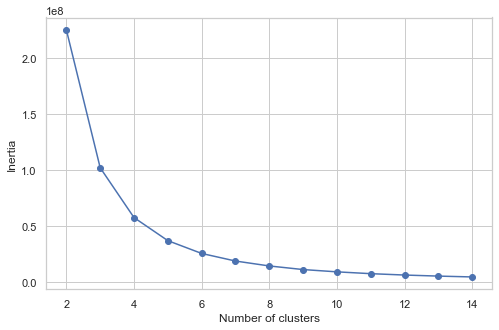

In [13]:
scores = []
for k in range(2,15):
    km = KMeans(n_clusters=k,random_state=123)
    km = km.fit(dataset)
    scores.append(km.inertia_)
dfk = pd.DataFrame({'Cluster':range(2,15), 'Score':scores})
plt.figure(figsize=(8,5))
plt.plot(dfk['Cluster'], dfk['Score'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

Silhoutte Score: This method is used to investigate clustering algorithms and it tells how close the point is to one 
    cluster. It ranges from -1 to +1. 

In [14]:
for i in range(2,8):
    kmeans_labels=KMeans(n_clusters=i,random_state=123).fit_predict(dataset)
    print("Silhouette score for {} clusters k-means : {} ".format(i,metrics.silhouette_score(dataset,kmeans_labels, metric='euclidean').round(3)))

Silhouette score for 2 clusters k-means : 0.648 
Silhouette score for 3 clusters k-means : 0.602 
Silhouette score for 4 clusters k-means : 0.58 
Silhouette score for 5 clusters k-means : 0.566 
Silhouette score for 6 clusters k-means : 0.559 
Silhouette score for 7 clusters k-means : 0.552 


Davis Bouldin score: It is an average similarity measure of each cluster with its most similar cluster.
    The lower values, the better clustering performance.

In [15]:
for i in [2,3,4,5,6,7,8]:
    kmeans_labels=KMeans(n_clusters=i,random_state=123).fit_predict(dataset)
    print('Davies Bouldin Score:'+str(metrics.davies_bouldin_score(dataset,kmeans_labels).round(3)))
    
    
'''pca = PCA(n_components=3).fit_transform(dataset)
fig = plt.figure(figsize=(12, 7), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")
ax.scatter3D(pca.T[0],pca.T[1],pca.T[2],c=kmeans_labels,cmap='Spectral')

xLabel = ax.set_xlabel('X')
yLabel = ax.set_ylabel('Y')
zLabel = ax.set_zlabel('Z')'''

Davies Bouldin Score:0.511
Davies Bouldin Score:0.507
Davies Bouldin Score:0.504
Davies Bouldin Score:0.504
Davies Bouldin Score:0.501
Davies Bouldin Score:0.503
Davies Bouldin Score:0.503


'pca = PCA(n_components=3).fit_transform(dataset)\nfig = plt.figure(figsize=(12, 7), dpi=80, facecolor=\'w\', edgecolor=\'k\')\nax = plt.axes(projection="3d")\nax.scatter3D(pca.T[0],pca.T[1],pca.T[2],c=kmeans_labels,cmap=\'Spectral\')\n\nxLabel = ax.set_xlabel(\'X\')\nyLabel = ax.set_ylabel(\'Y\')\nzLabel = ax.set_zlabel(\'Z\')'

# Clustering done for payment history against credit score

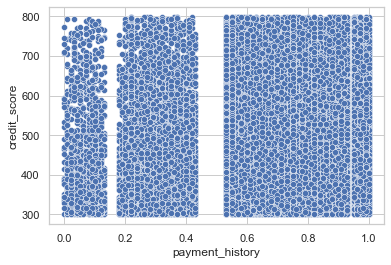

[0 0 0 ... 1 1 0]


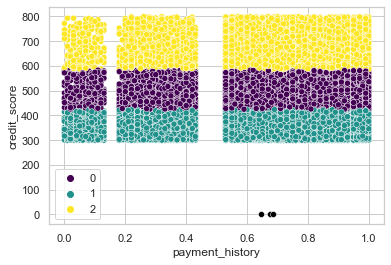

[[6.75271092e-01 1.25443107e-01 5.67247751e-01 5.31003525e-01
  3.88549720e-01 4.93433260e+02 9.79333820e-01]
 [6.44496055e-01 1.91433311e-01 5.51128806e-01 5.25452702e-01
  4.51837352e-01 3.54908722e+02 9.73272875e-01]
 [6.84704136e-01 9.15926089e-02 5.79258689e-01 5.41813682e-01
  2.94938407e-01 6.73570392e+02 9.77672679e-01]]
Silhouette score for k(clusters) = 2 is 0.47440502669303625
Silhouette score for k(clusters) = 3 is 0.4409499324451905
Silhouette score for k(clusters) = 4 is 0.4097979651933312
Silhouette score for k(clusters) = 5 is 0.39155277161924973
Silhouette score for k(clusters) = 6 is 0.40178522855097754
Silhouette score for k(clusters) = 7 is 0.3781657858632761
Silhouette score for k(clusters) = 8 is 0.3861637707482097
Silhouette score for k(clusters) = 9 is 0.38027364030112576
Silhouette score for k(clusters) = 10 is 0.37524665325442175
Silhouette score for k(clusters) = 11 is 0.3715192229299406
Silhouette score for k(clusters) = 12 is 0.3642247462117359


In [16]:
sns.scatterplot(data = dataset, x="payment_history", y= "credit_score")
plt.show()



clu = KMeans(n_clusters= 3)

clu.fit(dataset)

print(clu.labels_)#printing labesls of the cluster

dataset['Clusters'] = clu.labels_
sns.scatterplot(data = dataset, x="payment_history", y= "credit_score", c= clu.labels_, hue = 'Clusters', palette='viridis')

sns.scatterplot(x=clu.cluster_centers_[:, 0], y=clu.cluster_centers_[:, 1], c=['black'])
plt.show()
# Displaying the cluster centroids as a list
print(clu.cluster_centers_)
'''prediction = clu.predict([[41,53]])
print(prediction)'''

import sklearn.cluster as cluster
import sklearn.metrics as metrics
for i in range(2,13):
    labels=cluster.KMeans(n_clusters=i,random_state=200).fit(dataset.values[:,:2]).labels_
    print ("Silhouette score for k(clusters) = "+str(i)+" is "
           +str(metrics.silhouette_score(dataset.values[:,:2],labels,metric="euclidean",
                                         sample_size=1000,random_state=200)))

# Clustering done for len_credit_history against credit score

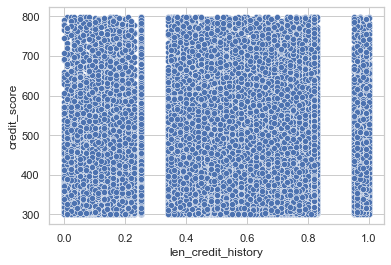

[0 0 0 ... 1 1 0]


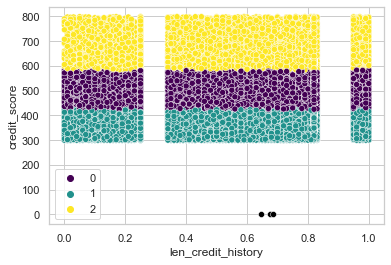

[[6.75271092e-01 1.25443107e-01 5.67247751e-01 5.31003525e-01
  3.88549720e-01 4.93433260e+02 9.79333820e-01 3.71924713e-14]
 [6.44496055e-01 1.91433311e-01 5.51128806e-01 5.25452702e-01
  4.51837352e-01 3.54908722e+02 9.73272875e-01 1.00000000e+00]
 [6.84704136e-01 9.15926089e-02 5.79258689e-01 5.41813682e-01
  2.94938407e-01 6.73570392e+02 9.77672679e-01 2.00000000e+00]]
Silhouette score for k(clusters) = 2 is 0.47440502669303625
Silhouette score for k(clusters) = 3 is 0.4409499324451905
Silhouette score for k(clusters) = 4 is 0.4097979651933312
Silhouette score for k(clusters) = 5 is 0.39155277161924973
Silhouette score for k(clusters) = 6 is 0.40178522855097754
Silhouette score for k(clusters) = 7 is 0.3781657858632761
Silhouette score for k(clusters) = 8 is 0.3861637707482097
Silhouette score for k(clusters) = 9 is 0.38027364030112576
Silhouette score for k(clusters) = 10 is 0.37524665325442175
Silhouette score for k(clusters) = 11 is 0.3715192229299406
Silhouette score for k(clus

In [17]:
sns.scatterplot(data = dataset, x="len_credit_history", y= "credit_score")
plt.show()



clu = KMeans(n_clusters= 3)

clu.fit(dataset)

print(clu.labels_)


# Plot the clusters identified by the kmeans algorithm
dataset['Clusters'] = clu.labels_
sns.scatterplot(data = dataset, x="len_credit_history", y= "credit_score", c= clu.labels_, hue = 'Clusters', palette='viridis')

#plotting the centroids
sns.scatterplot(x=clu.cluster_centers_[:, 0], y=clu.cluster_centers_[:, 1], c=['black'])
plt.show()


# Displaying the cluster centroids as a list
print(clu.cluster_centers_)


import sklearn.cluster as cluster
import sklearn.metrics as metrics
for i in range(2,13):
    labels=cluster.KMeans(n_clusters=i,random_state=200).fit(dataset.values[:,:2]).labels_
    print ("Silhouette score for k(clusters) = "+str(i)+" is "
           +str(metrics.silhouette_score(dataset.values[:,:2],labels,metric="euclidean",
                                         sample_size=1000,random_state=200)))